# Loan Eligibility Problem

## Problem Statement:

This dataset concerns on loan data. When a customer applies for a loan at our company, we use statistical models to determine whether or not to grant the loan based on likelihood of the loan being paid. The factors involved in determining this likelihood are complex and extensive statistical analysis and modelling are required to predict the outcome for each individual case. We are implementing model that predicts if a loan should be granted to an individual based on the data provided in training dataset.
The dataset used is an anonymized synthetic data that was generated specifically for use in this project. The data is designed to exhibit similar characteristics to genuine loan data.

## Description of the data:
In This dataset we have over 1,00,000 loan records to determine the best way to predict whether a loan applicant should be granted a loan or not .Build a machine learning model that returns a unique customer id and loan status label which indicates whether the loan should be given to that individual or not.  

The dataset consists of the following fields/feature in the csv file: 

- Loan ID: A unique identifier for the loan information
- Customer ID: A unique identifier for the customer (Customer may have more than one loan)
- Loan Status : A categorical variable indicating if the loan was given to the customer (i.e loan given or loan refused)
- Current Loan amount: This is the loan amount that either completely paid off or the amount was defaulted
- Term: A categorical variable indicating if it is a short term or long term loan
- Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history
- Years in current job: A categorical variable indicating how many years the customer has been in their current job
- Home Ownership: A categorical variable indicating home ownership , values are “RENT”,”HOME MORTGAGE” and “OWN”. If the value is own , then the customer is a home owner with no mortgage
- Annual Income: The customer’s annual income
- Purpose: A description of the purpose of the loan
- Monthly Debt: The customer’s monthly payment for their existing loans
- Years of credit score :The years since the first entry in the customer’s credit history
- Months since last delinquent: Months since the last delinquent payment
- Number of open accounts: The total number of open credit cards
- Number of credit problems: The number of credit problems in the customer records
- Current Credit balance: the current total debt for the customer
- Maximum open credit: the maximum credit limit for all credit sources
- Bankruptcies: the number of bankruptcies
- Tax Liens: the number of tax liens

### Loading Libraries

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import statsmodels.api   as sm
import scipy.stats       as stats
import lightgbm          as lgb
import datetime          as dt
import matplotlib
import pydotplus

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


from math                      import sqrt
from sklearn.datasets          import load_boston
from sklearn.model_selection   import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model      import LinearRegression, LogisticRegression
from sklearn.linear_model      import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model      import ElasticNetCV, ElasticNet
from sklearn.metrics           import mean_squared_error
from sklearn.metrics           import r2_score, roc_auc_score, roc_curve, cohen_kappa_score
from sklearn.metrics           import confusion_matrix, accuracy_score, classification_report
from sklearn.tree              import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.externals.six     import StringIO
from sklearn.preprocessing     import StandardScaler
from sklearn.ensemble          import RandomForestClassifier, VotingClassifier
from sklearn.neighbors         import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes       import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm               import SVC, SVR
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster           import KMeans, AgglomerativeClustering
from sklearn.experimental      import enable_iterative_imputer
from sklearn.impute            import IterativeImputer
from collections               import Counter as count

from IPython.display           import Image

from scipy.stats               import randint as sp_randint
from scipy.cluster.hierarchy   import dendrogram, linkage

from statsmodels.stats.outliers_influence import variance_inflation_factor

from imblearn.over_sampling    import SMOTE

from scipy.stats               import ttest_1samp,ttest_ind, wilcoxon
from scipy.stats               import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare

from statsmodels.stats.power   import ttest_power

### Loading Dataset

In [2]:
lp = pd.read_csv('LoansTrainingSetV2.csv')
lp.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Loan Refused,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Loan Refused,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Loan Refused,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Loan Refused,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Loan Refused,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


### Nature of the Data

In [3]:
print("Dataset contains",lp.shape[0],"observations and" , lp.shape[1], "attributes")

Dataset contains 111107 observations and 19 attributes


### Dataset Attributes

In [4]:
lp.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

### Statistical Overview

In [5]:
lp.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


### Concise summary of the data

In [6]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
Loan ID                         111107 non-null object
Customer ID                     111107 non-null object
Loan Status                     111107 non-null object
Current Loan Amount             111107 non-null int64
Term                            111107 non-null object
Credit Score                    89769 non-null float64
Years in current job            106414 non-null object
Home Ownership                  111107 non-null object
Annual Income                   89769 non-null float64
Purpose                         111107 non-null object
Monthly Debt                    111107 non-null object
Years of Credit History         111107 non-null float64
Months since last delinquent    52104 non-null float64
Number of Open Accounts         111107 non-null int64
Number of Credit Problems       111107 non-null int64
Current Credit Balance          111107 non-null int64
Maximum Open

In [7]:
dfb=lp.copy()

### Variable Categorization

In [8]:
cat_cols = lp.select_dtypes(['object']).columns
print("Count of categorical values are",cat_cols.value_counts().sum())

Count of categorical values are 9


In [9]:
num_cols = lp.select_dtypes(['float64','int64']).columns
print("Count of numerical values are",num_cols.value_counts().sum())

Count of numerical values are 10


In [10]:
dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].replace({'#VALUE!':np.nan})

dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].astype(float)

dfb['Maximum Open Credit'].isnull().sum()

2

In [11]:
dfb['Maximum Open Credit']=dfb['Maximum Open Credit'].fillna(dfb['Maximum Open Credit'].median())

In [12]:
dfb['Monthly Debt']=dfb['Monthly Debt'].replace({'$1051.41':'1051.41','$157.15':'157.15','$944.7':'944.7','$481.34':'481.34','$1838.98':'1838.98','$471.6':'471.6'})

dfb['Monthly Debt']=dfb['Monthly Debt'].astype(float)

In [13]:
dfb['Tax Liens'] = dfb['Tax Liens'].fillna(dfb['Tax Liens'].mode()[0])

In [14]:
dfb['Bankruptcies'] = dfb['Bankruptcies'].fillna(dfb['Bankruptcies'].mode()[0])

In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
mice_imputer= IterativeImputer(initial_strategy='median',imputation_order='random',random_state=3)

In [17]:
df2=dfb[['Credit Score','Annual Income','Months since last delinquent']]

In [18]:
df2.iloc[:,:]=np.round(mice_imputer.fit_transform(df2))

In [19]:
df1=dfb.drop(columns=['Credit Score','Annual Income','Months since last delinquent'],axis=1)

In [20]:
result= pd.concat([df1,df2], axis=1)

In [21]:
result['Credit Score']=result[result['Credit Score']<=800]['Credit Score']

In [22]:
result['Credit Score']= result['Credit Score'].fillna(800)

In [23]:
result['Tax Liens'] = result['Tax Liens'].astype('object')

In [24]:
result['Bankruptcies'] = result['Bankruptcies'].astype('object')

In [25]:
num_cols1 = result.select_dtypes(['float64','int64']).columns

In [26]:
from scipy.stats import skew, norm, probplot, boxcox

In [27]:
skewed_features = result[num_cols1].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness = pd.DataFrame({'Skew' :skewed_features})  

In [28]:
# Get only higest skewed features
skewness = skewness[abs(skewness) > 0.7]
skewness = skewness.dropna()
print ("There are {} highest skewed numerical features to box cox transform".format(skewness.shape[0]))

There are 8 highest skewed numerical features to box cox transform


In [29]:
#Create Empty list 
l_opt = {}

#create for loop for skewness.index
for feat in skewness.index:
    result[feat], l_opt[feat] = boxcox((result[feat]+1))

In [30]:
#create skewed_features2 for skewness.index
skewed_features2 = result[skewness.index].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)

#compute skewness
skewness2 = pd.DataFrame({'New Skew' :skewed_features2}) 

In [31]:
# concat both skewness, skewness2
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

,Skew,New Skew
Maximum Open Credit,136.993677,0.659540
Annual Income,49.515852,-0.002033
Current Credit Balance,14.184075,0.193766
Number of Credit Problems,4.904700,2.084735
Current Loan Amount,2.419085,0.250956
Monthly Debt,2.212429,0.049988
Number of Open Accounts,1.182993,0.002508
Years of Credit History,1.071703,0.001111


In [32]:
skewed_features2

Number of Credit Problems    2.084735
Maximum Open Credit          0.659540
Current Loan Amount          0.250956
Current Credit Balance       0.193766
Monthly Debt                 0.049988
Number of Open Accounts      0.002508
Years of Credit History      0.001111
Annual Income               -0.002033
dtype: float64

In [33]:
result['Loan Status']=result['Loan Status'].replace({'Loan Refused': 0,'Loan Given': 1 })

In [34]:
result['Term']=result['Term'].replace({'Short Term': 0, 'Long Term': 1})

In [35]:
result = result.drop(['Loan ID','Customer ID','Months since last delinquent'],axis=1)

In [36]:
result['Years of Credit History'].skew()

0.0011105491311304123

In [37]:
result['Home Ownership'] = result['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'})

In [38]:
result["Purpose"].replace({"other": "others", "Other": "others"}, inplace=True)

### Data Preprocessing

Data preprocessing is done to enhance the quality of data to promote extraction of meaningful insights from the data.
In simple words, cleaning and organizing the raw data to make it suitable for building and training machine learning models.
Data preprocessing in machine learning is a data mining technique that transforms raw data into an understandable and readable format.

Here Data Preprocessing is going to be done through each columns

Checking for Outliers

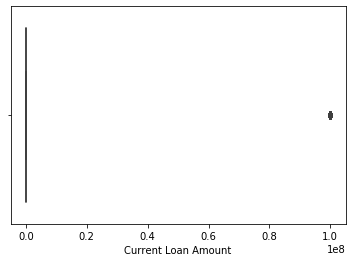

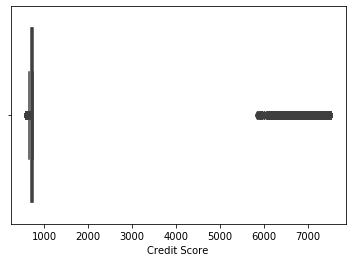

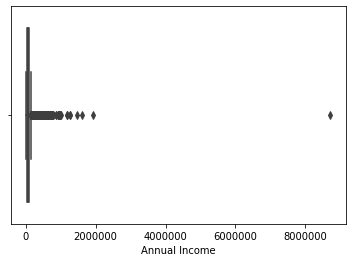

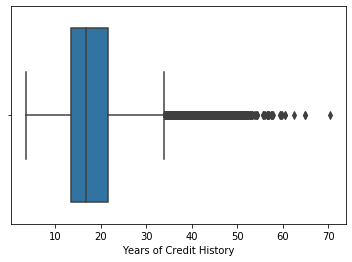

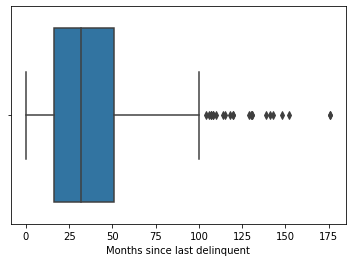

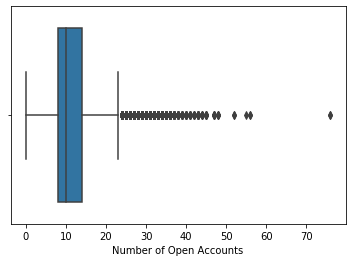

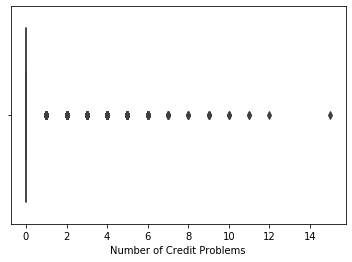

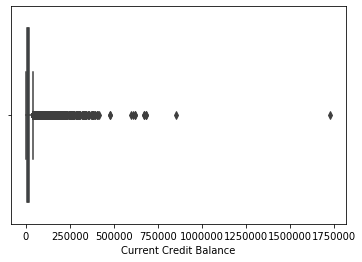

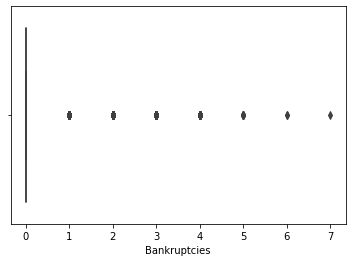

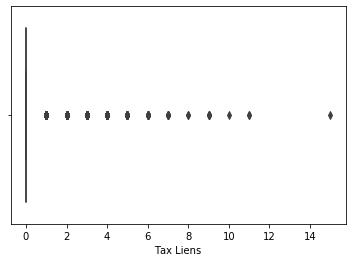

In [39]:
for col in num_cols:
    sns.boxplot(lp[col])
    plt.show()

### Starting with Loan ID

In [40]:
lp['Loan ID'].dtype

dtype('O')

In [41]:
#pd.set_option('display.max_rows',None)

In [42]:
lp['Loan ID'].value_counts()

dd872f8c-8077-4d1e-a265-b80c832718e0    2
1a50e584-c5b4-4381-bfe3-66e437722cf5    2
a7d13dea-51a3-40c0-80ff-d3028ece0ac8    2
8cbbcee3-764e-47ae-a6f9-cfd0abb551fa    2
bd333f84-5bbf-48cd-99ac-222ba7e3b556    2
                                       ..
4524f676-cd4a-4c93-bc02-ebe1542ee5e3    1
b543b464-cf36-4996-bafa-bfab8b5b9559    1
ff4f1e3c-0434-401f-9848-3041fc57e30a    1
d8602ce5-e2cf-4a0c-814f-004639fbf373    1
2ea2adc5-671c-4996-afa0-cd68cf8e3488    1
Name: Loan ID, Length: 88910, dtype: int64

Here we could infer that for some of the loan ID's there could be one customer for whom two type of loans has been sanctioned 

### Customer ID

In [43]:
lp['Customer ID'].dtype

dtype('O')

In [44]:
lp['Customer ID'].value_counts()

cc367161-2e1a-43f4-a491-eb4e95b5f08e    2
739e5bde-d243-4a1d-adfb-19276910910e    2
6bf19425-9458-49e1-a3a2-cf7b5ecad85a    2
136944f8-2558-4f8c-80eb-bdb55ffa7500    2
380e15ef-a4c3-4124-a08c-9583fe120bbf    2
                                       ..
17913e02-4cd8-41ad-a96d-e5b4a8b6814f    1
5f4194a6-336f-4dd1-ba1f-ecacf035bf30    1
3989ef92-8481-4d1e-b3fa-8815eb422fd6    1
41ce49cc-dc20-4a11-a1b0-2a2ad119b5a0    1
47510107-8492-47b7-8bcf-06560fe18d87    1
Name: Customer ID, Length: 88910, dtype: int64

Here there are some unique and non-unique Id's

### Loan Status

In [45]:
lp['Loan Status'].value_counts(normalize = True)*100

Loan Given      77.343462
Loan Refused    22.656538
Name: Loan Status, dtype: float64

### Data Imbalance

Loan Given      85934
Loan Refused    25173
Name: Loan Status, dtype: int64



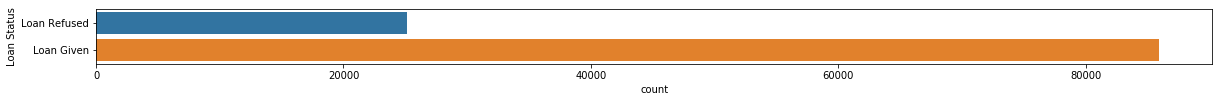

In [46]:
# Lets visualize loan status
print(lp['Loan Status'].value_counts())
print()
plt.figure(figsize=(20,1))
sns.countplot(y= "Loan Status", data = lp)
plt.show()

About 3/4th of applicants have been granted loan

Since this is the target problem we are checking for Data Imbalance and it is evident that thare are more people loan been refused

In [47]:
lp['Loan Status']=lp['Loan Status'].replace({'Loan Refused': 0,'Loan Given': 1 })

### Current Loan Amount

Current Loan means, as of any date, a Loan as to which all payments of principal and interest then due have been paid, except for the most recent payment then due of principal and interest.

In [48]:
lp['Current Loan Amount'].dtype

dtype('int64')

In [49]:
lp['Current Loan Amount'].isnull().sum()

0

Here there are no NULL values Now checking the outliers

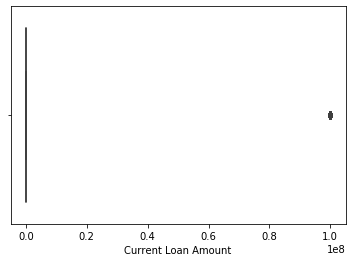

In [50]:
sns.boxplot(lp['Current Loan Amount'])

In [51]:
lp['Current Loan Amount'].skew()

2.4191181268712363

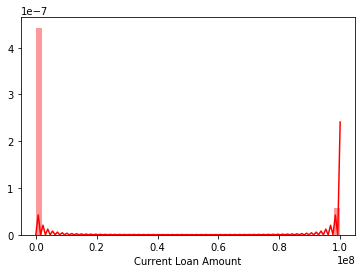

In [52]:
sns.distplot(lp['Current Loan Amount'],kde=True, color="red")

In [53]:
def boxco(original_data):

  
    # transform training data & save lambda value 
    fitted_data, fitted_lambda = stats.boxcox(original_data) 
  
    # creating axes to draw plots 
    fig, ax = plt.subplots(1, 2) 
  
    # plotting the original data(non-normal) and  
    # fitted data (normal) 
    sns.distplot(original_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Non-Normal", color ="green", ax = ax[0]) 
  
    sns.distplot(fitted_data, hist = False, kde = True, 
                kde_kws = {'shade': True, 'linewidth': 2},  
                label = "Normal", color ="green", ax = ax[1]) 
  
    # adding legends to the subplots 
    plt.legend(loc = "upper right") 
  
    # rescaling the subplots 
    fig.set_figheight(5) 
    fig.set_figwidth(10)   
    print(f"Lambda value used for Transformation: {fitted_lambda}")
    print(original_data.skew())
    return fitted_data

In [54]:
lp['Current Loan Amount']=np.log1p(lp['Current Loan Amount'])
lp['Current Loan Amount'].skew()

2.1885524973194848

In [55]:
#lp['Current Loan Amount']=boxco(lp['Current Loan Amount'])

In [56]:
lp['Current Loan Amount'].skew()

2.1885524973194848

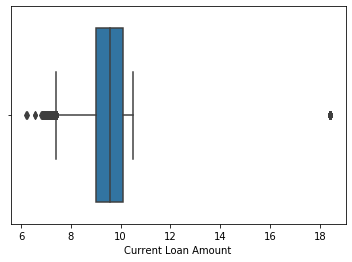

In [57]:
sns.boxplot(lp['Current Loan Amount'])

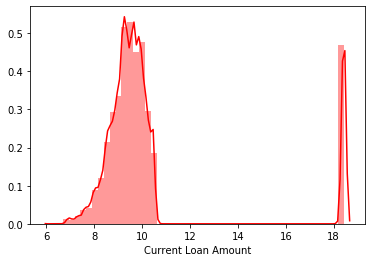

In [58]:
sns.distplot(lp['Current Loan Amount'],kde=True, color="red")

### Term column

A term loan is a monetary loan that is repaid in regular payments over a set period of time. Term loans usually last between one and ten years, but may last as long as 30 years in some cases. A term loan usually involves an unfixed interest rate that will add additional balance to be repaid.

In [59]:
lp['Term'].dtype

dtype('O')

Short Term    80274
Long Term     30833
Name: Term, dtype: int64



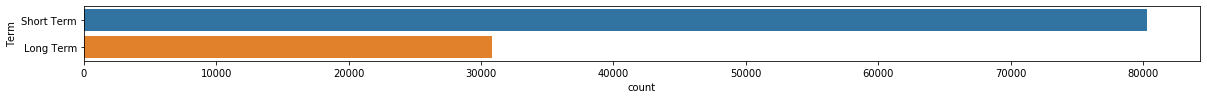

In [60]:
print(lp['Term'].value_counts())
print()
plt.figure(figsize=(20,1))
sns.countplot(y= "Term", data = lp)
plt.show()

In [61]:
lp['Term'].isnull().sum()

0

In [62]:
lp['Term']=lp['Term'].replace({'Short Term': 0, 'Long Term': 1})

Replacing Short Term and Long Term can br replaced with 0's and 1's

### Credit Score

Credit scoring is a statistical analysis performed by lenders and financial institutions to access a person's creditworthiness. Credit scoring is used by lenders to help decide on whether to extend or deny credit. A person's credit score is a number between 300 and 850, 850 being the highest credit rating possible. A credit score can impact many financial transactions including mortgages, auto loans, credit cards, and private loans.

In [63]:
lp['Credit Score'].dtype

dtype('float64')

So if we look here there are credit scores greater than 800(900) which may be extreme value or outliers which we have to look into it

In [64]:
lp['Credit Score'].isnull().sum()

21338

In [65]:
lp['Credit Score'].isnull().mean()

0.19204910581691523

In [66]:
#pd.set_option('display.max_rows',None)

In [67]:
lp['Credit Score']

0         7280.0
1         7330.0
2         7240.0
3         7400.0
4         6860.0
           ...  
111102     686.0
111103     706.0
111104     719.0
111105     626.0
111106     708.0
Name: Credit Score, Length: 111107, dtype: float64

In [68]:
lp['Credit Score'].isnull().sum()

21338

In [69]:
#lp['Credit Score'] = lp[lp['Credit Score']>=850].replace(np.nan)

In [70]:
lp['Credit Score'].isnull().mean()

0.19204910581691523

In [71]:
lp['Credit Score'].isnull().sum()

21338

Here 23.7% of the values are missing, imputing it with MICE technique

In [72]:
mice_imputer= IterativeImputer(initial_strategy='median',imputation_order='random',random_state=3)

In [73]:
df2=lp[['Credit Score']]

In [74]:
df2.iloc[:,:]=np.round(mice_imputer.fit_transform(df2))

In [75]:
df2.isnull().sum()

Credit Score    0
dtype: int64

In [76]:
df1=lp.drop(columns=['Credit Score'],axis=1)

In [77]:
dff= pd.concat([df1,df2], axis=1)

In [78]:
dff['Credit Score'] = dff[dff['Credit Score']<=850]['Credit Score']

In [79]:
dff['Credit Score'].isnull().sum()

5044

In [80]:
dff['Credit Score']= dff['Credit Score'].fillna(850)

In [81]:
dff['Credit Score']=np.log1p(dff['Credit Score']) 

In [82]:
dff['Credit Score'].skew()

0.6297207393269575

In [83]:
dff['Credit Score']

0         6.746412
1         6.746412
2         6.746412
3         6.746412
4         6.746412
            ...   
111102    6.532334
111103    6.561031
111104    6.579251
111105    6.440947
111106    6.563856
Name: Credit Score, Length: 111107, dtype: float64

In [84]:
#dff['Credit Score']=np.log1p(dff['Credit Score'])
#dff['Credit Score'].skew()

In [85]:
#dff['Credit Score']=boxco(dff['Credit Score'])

In [86]:
dff['Credit Score']=np.log1p(dff['Credit Score']) 

In [87]:
dff['Credit Score'].skew()

0.5706019478197643

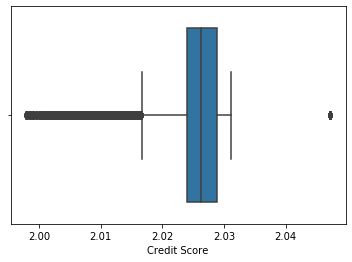

In [88]:
sns.boxplot(dff['Credit Score'])

### Years in current job

In [89]:
dff['Years in current job'].dtype

dtype('O')

In [90]:
dff['Years in current job'].value_counts()

10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: Years in current job, dtype: int64

In [91]:
dff['Years in current job'].isnull().sum()

4693

In [92]:
dff['Years in current job'].isnull().mean()

0.042238562826824595

Here 'Years in current job' column is in object type its better to change its type to 'int' and regardng null values only 4% are missing hence we can impute it with MODE 

In [93]:
dff['Years in current job'] = dff['Years in current job'].fillna(dff['Years in current job'].mode()[0]) 

In [94]:
dff['Years in current job'].isnull().sum()

0

Later on we can take dummies for this levels

### Home Ownership

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64



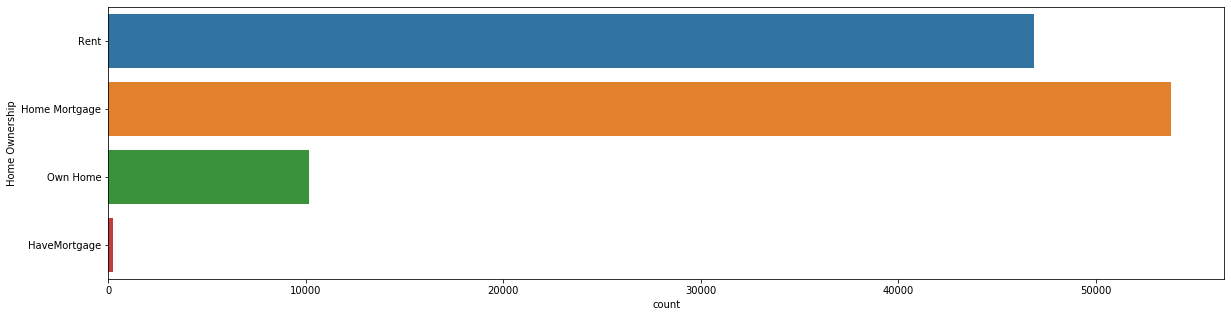

In [95]:
print(dff['Home Ownership'].value_counts())
print()
plt.figure(figsize=(20,5))
sns.countplot(y= "Home Ownership", data = dff)
plt.show()

Here we could see there is a data entry like 'HaveMortgage' which is wrong entry as it is same as 'Home Mortgage' Hence we are replacing it

In [96]:
dff['Home Ownership'] = dff['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'})

Home Mortgage    54051
Rent             46868
Own Home         10188
Name: Home Ownership, dtype: int64



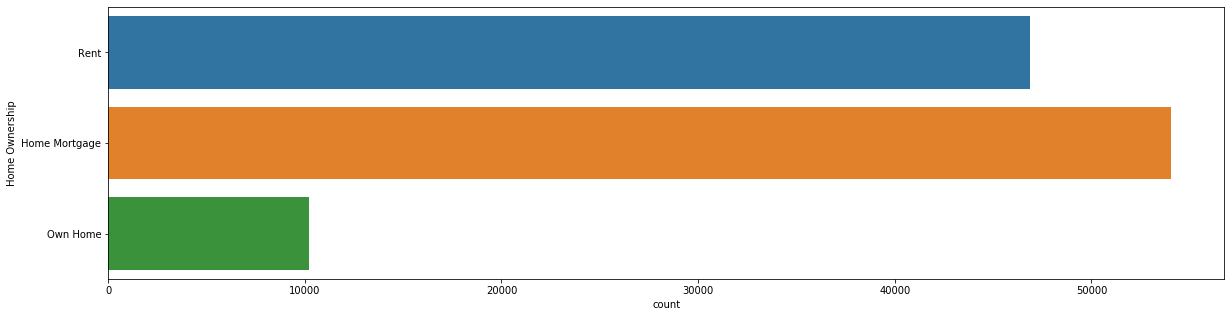

In [97]:
print(dff['Home Ownership'].value_counts())
print()
plt.figure(figsize=(20,5))
sns.countplot(y= "Home Ownership", data = dff)
plt.show()

In [98]:
dff['Home Ownership'].isnull().sum()

0

Later on we can apply dummy variable for Home Ownership column

### Annual Income

In [99]:
dff['Annual Income'].dtype

dtype('float64')

In [100]:
dff['Annual Income'].isnull().sum()

21338

In [101]:
dff['Annual Income'].isnull().mean()

0.19204910581691523

Here also 19% of the values are missing, impute it with MICE values

In [102]:
mice_imputer= IterativeImputer(initial_strategy='median',imputation_order='random',random_state=3)

In [103]:
df2=dff[['Annual Income']]

In [104]:
df2.iloc[:,:]=np.round(mice_imputer.fit_transform(df2))

In [105]:
df2.isnull().sum()

Annual Income    0
dtype: int64

In [106]:
df1=dff.drop(columns=['Annual Income'],axis=1)

In [107]:
dfff= pd.concat([df1,df2], axis=1)

In [108]:
dfff['Annual Income'].isnull().sum()

0

In [109]:
dfff['Annual Income'].skew()

49.3786801265992

In [110]:
dfff['Annual Income']=np.log1p(dfff['Annual Income'])
dfff['Annual Income'].skew()

0.20073581967884313

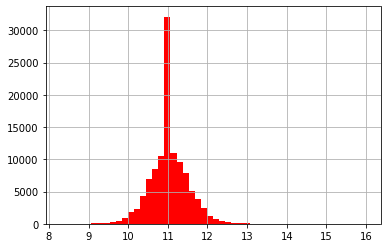

In [111]:
dfff['Annual Income'].hist(bins = 50, color = 'red')
plt.show()

After taking lo transform the skewness reduced to 0.2 and it is partially normal disributed

### Purpose

In [112]:
dfff['Purpose'].dtype

dtype('O')

Debt Consolidation      87277
other                    6671
Home Improvements        6504
Other                    3595
Business Loan            1749
Buy a Car                1422
Medical Bills            1259
Buy House                 758
Take a Trip               622
major_purchase            407
small_business            318
moving                    167
wedding                   126
Educational Expenses      114
vacation                  107
renewable_energy           11
Name: Purpose, dtype: int64



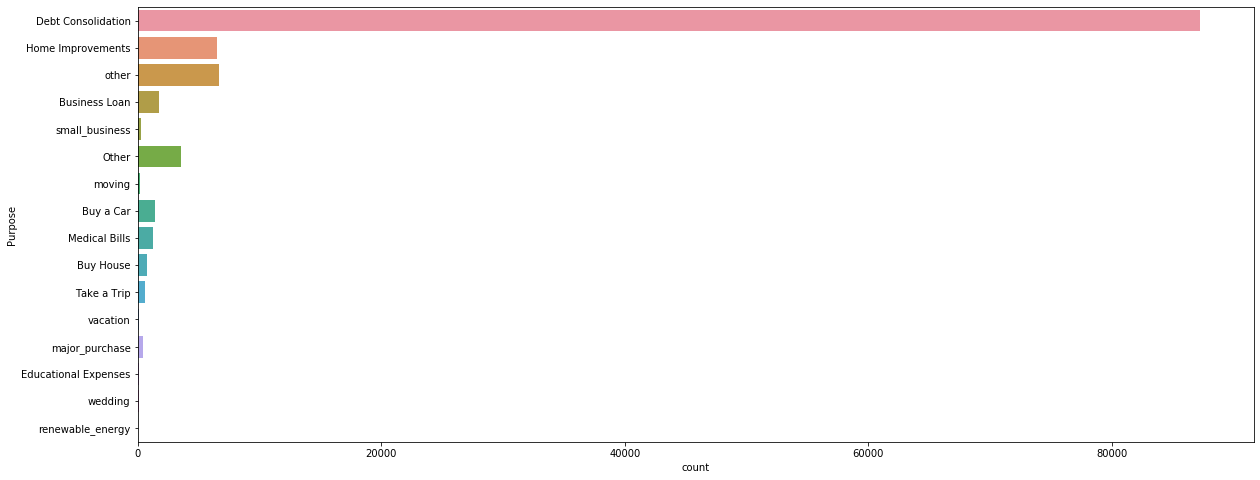

In [113]:
print(dfff['Purpose'].value_counts())
print()
plt.figure(figsize=(20,8))
sns.countplot(y= "Purpose", data = dfff)
plt.show()

In [114]:
dfff["Purpose"].replace({"other": "others", "Other": "others"}, inplace=True)

In [115]:
lp['Purpose'].isnull().sum()

0

Later on we can apply dummy variable for 'Purpose' column

### Monthly Debt

The person who directly draws the funds ("the payee") instructs his or her bank to collect (i.e., debit) an amount directly from another's ("the payer's") bank account designated by the payer and pay those funds into a bank account designated by the payee

In [116]:
dfff['Monthly Debt'].dtype

dtype('O')

In [117]:
dfff['Monthly Debt'].isnull().sum()

0

In [118]:
#pd.set_option('display.max_rows',None)

In [119]:
#dfff['Monthly Debt']

In [120]:
dfff['Monthly Debt']=dfff['Monthly Debt'].replace({'$1051.41':'1051.41','$157.15':'157.15','$944.7':'944.7','$481.34':'481.34','$1838.98':'1838.98','$471.6':'471.6'})

This column has to be converted in to 'int' type

In [121]:
dfff['Monthly Debt'] = dfff['Monthly Debt'].astype(float)

In [122]:
dfff['Monthly Debt'].dtype

dtype('float64')

In [123]:
dfff['Monthly Debt'].isnull().sum()

0

In [124]:
#dfff[dfff['Monthly Debt']=='$471.6'][['Loan Status','Current Loan Amount','Purpose','Tax Liens','Bankruptcies','Credit Score','Current Credit Balance','Years of Credit History','Maximum Open Credit','Loan ID']]

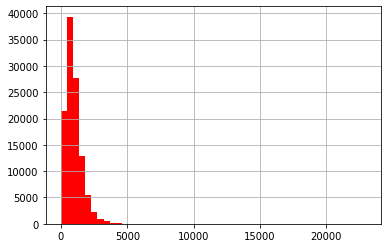

In [125]:
dfff['Monthly Debt'].hist(bins = 50, color = 'red')
plt.show()

In [126]:
dfff['Monthly Debt'].skew()

2.2124591057368637

In [127]:
dfff['Monthly Debt']=np.log1p(dfff['Monthly Debt'])
dfff['Monthly Debt'].skew()

-1.4934214266416623

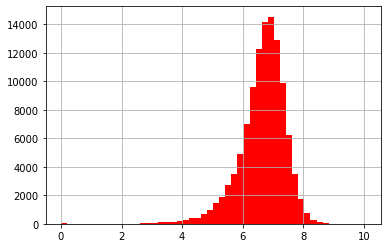

In [128]:
dfff['Monthly Debt'].hist(bins = 50, color = 'red')
plt.show()

### Years of Credit History

Credit history is a record of your debts, payment history and any public records. Simply put, the length of your credit history is how long you've used credit. The length of your credit history begins when you open your first credit card or take out your first loan.

In [129]:
dfff['Years of Credit History'].dtype

dtype('float64')

In [130]:
dfff['Years of Credit History'].isnull().sum()

0

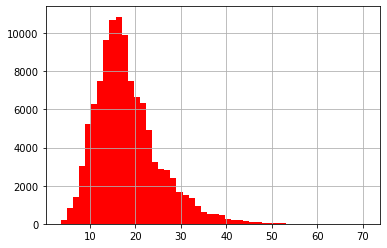

In [131]:
dfff['Years of Credit History'].hist(bins = 50, color = 'red')
plt.show()

In [132]:
dfff['Years of Credit History'].skew()

1.0717178139490298

In [133]:
dfff['Years of Credit History']=np.log1p(dfff['Years of Credit History'])
dfff['Years of Credit History'].skew()

-0.07104004848148053

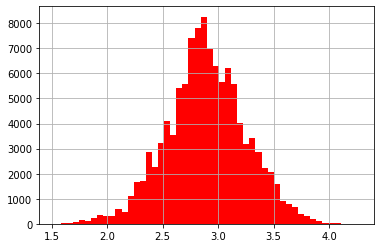

In [134]:
dfff['Years of Credit History'].hist(bins = 50, color = 'red')
plt.show()

This is column pretty good to go

### Months since last delinquent

In [135]:
dfff['Months since last delinquent'].dtype

dtype('float64')

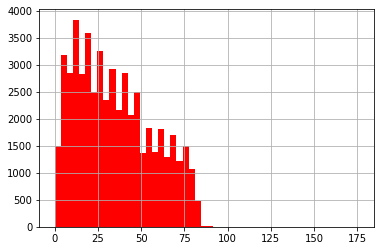

In [136]:
dfff['Months since last delinquent'].hist(bins = 50, color = 'red')
plt.show()

In [137]:
dfff['Months since last delinquent'].isnull().sum()

59003

In [138]:
dfff['Months since last delinquent'].isnull().mean()

0.5310466487260028

Here we could see that over 53% of the data are missing, Here we can remove the column

### Number of Open Accounts

In [139]:
dfff['Number of Open Accounts'].dtype

dtype('int64')

In [140]:
#dfff['Number of Open Accounts'] = dfff['Number of Open Accounts'].astype('object')

In [141]:
dfff['Number of Open Accounts'].isnull().sum()

0

Here there are no NULL values

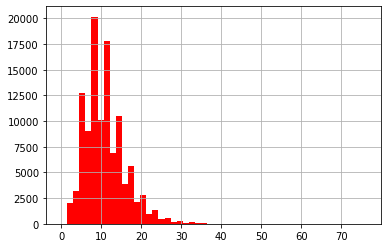

In [142]:
dfff['Number of Open Accounts'].hist(bins = 50, color = 'red')
plt.show()

In [143]:
dfff['Number of Open Accounts'].skew()

1.1830090447328487

In [144]:
dfff['Number of Open Accounts']=np.log1p(dfff['Number of Open Accounts'])
dfff['Number of Open Accounts'].skew()

-0.19775068207579216

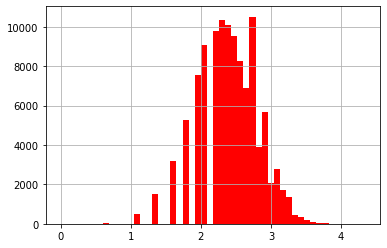

In [145]:
dfff['Number of Open Accounts'].hist(bins = 50, color = 'red')
plt.show()

# Number of Credit Problems

In [146]:
dfff['Number of Credit Problems'].dtype

dtype('int64')

In [147]:
dfff['Number of Credit Problems'].value_counts()

0     95642
1     13366
2      1444
3       418
4       135
5        59
6        19
7         8
9         5
8         4
10        3
11        2
15        1
12        1
Name: Number of Credit Problems, dtype: int64

In [148]:
#dfff['Number of Credit Problems'] = dfff['Number of Credit Problems'].astype('object')

In [149]:
dfff['Number of Credit Problems'].isnull().sum()

0

In [150]:
dfff['Number of Credit Problems'].value_counts()

0     95642
1     13366
2      1444
3       418
4       135
5        59
6        19
7         8
9         5
8         4
10        3
11        2
15        1
12        1
Name: Number of Credit Problems, dtype: int64

In [151]:
dfff['Number of Credit Problems'].skew()

4.904766070896559

In [152]:
dfff['Number of Credit Problems']=np.log1p(dfff['Number of Credit Problems']) 

In [153]:
dfff['Number of Credit Problems'].skew()

2.5676835422512685

### Current Credit Balance

In [154]:
dfff['Current Credit Balance'].dtype

dtype('int64')

In [155]:
dfff['Current Credit Balance'].isnull().sum()

0

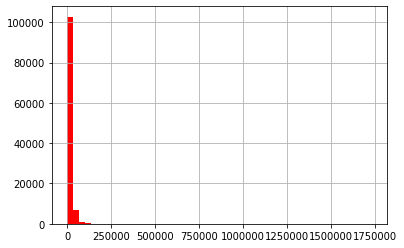

In [156]:
dfff['Current Credit Balance'].hist(bins = 50, color = 'red')
plt.show()

In [157]:
dfff['Current Credit Balance'].skew()

14.18426651655692

In [158]:
dfff['Current Credit Balance']=np.log1p(dfff['Current Credit Balance'])
dfff['Current Credit Balance'].skew()

-2.902036924417433

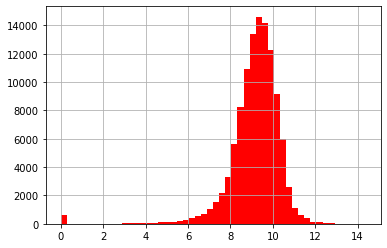

In [159]:
dfff['Current Credit Balance'].hist(bins = 50, color = 'red')
plt.show()

### Maximum Open Credit

In [160]:
dfff['Maximum Open Credit'].dtype

dtype('O')

In [161]:
dfff['Maximum Open Credit']=dfff['Maximum Open Credit'].replace({'#VALUE!':np.nan})

In [162]:
#lp['Maximum Open Credit']

In [163]:
#dfff['Maximum Open Credit'].value_counts()

This column has to be converted to numerical type

In [164]:
dfff['Maximum Open Credit'] = pd.to_numeric(dfff['Maximum Open Credit'],errors = 'coerce')

In [165]:
dfff['Maximum Open Credit'].isnull().sum()

2

Here there are only 2 missing values we can replace it with MICE 

In [166]:
dfff['Maximum Open Credit']=dfff['Maximum Open Credit'].fillna(dfff['Maximum Open Credit'].median())

In [167]:
dfff['Maximum Open Credit'].isnull().sum()

0

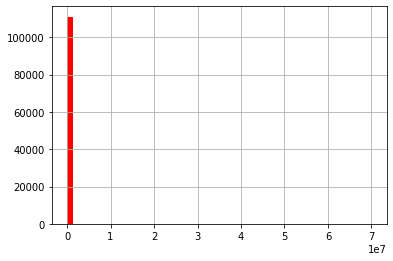

In [168]:
dfff['Maximum Open Credit'].hist(bins = 50, color = 'red')
plt.show()

In [169]:
dfff['Maximum Open Credit'].skew()

136.99552627841098

In [170]:
dfff['Maximum Open Credit']=np.log1p(dfff['Maximum Open Credit'])
dfff['Maximum Open Credit'].skew()

-3.961211396446603

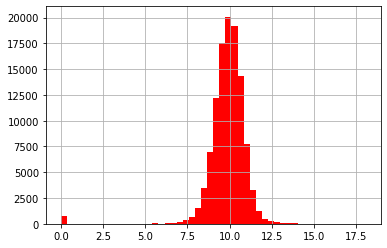

In [171]:
dfff['Maximum Open Credit'].hist(bins = 50, color = 'red')
plt.show()

### Bankruptcies

Bankruptcy is a legal proceeding carried out to allow individuals or businesses freedom from their debts, while simultaneously providing creditors an opportunity for repayment

In [172]:
dfff['Bankruptcies'].dtype

dtype('float64')

In [173]:
dfff['Bankruptcies'].value_counts()

0.0    98650
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

this column has to be converted into categorical colmun since the value is going to range from 0 to 7

In [174]:
dfff['Bankruptcies'] = dfff['Bankruptcies'].astype('object')

In [175]:
dfff['Bankruptcies'].dtype

dtype('O')

In [176]:
dfff['Bankruptcies'].isnull().sum()

228

Here we can replace the null values with MODE

In [177]:
dfff['Bankruptcies'] = dfff['Bankruptcies'].fillna(dfff['Bankruptcies'].mode()[0])

In [178]:
dfff['Bankruptcies'].isnull().sum()

0

In [179]:
dfff['Bankruptcies'].dtype

dtype('float64')

In [180]:
dfff['Bankruptcies'] = dfff['Bankruptcies'].astype('object')

In [181]:
dfff['Bankruptcies'].dtype

dtype('O')

### Tax Liens

A tax lien is a legal claim against the assets of an individual or business who fails to pay taxes owed to the government. In general, a lien serves to guarantee payment of a debt such as a loan or, in this case, taxes. If the obligation is not satisfied, the creditor may proceed to seize the assets.

In [182]:
dfff['Tax Liens'].dtype

dtype('float64')

In [183]:
dfff['Tax Liens'].value_counts()

0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
11.0         2
8.0          2
15.0         1
10.0         1
Name: Tax Liens, dtype: int64

In [184]:
dfff['Tax Liens'] = dfff['Tax Liens'].astype('object')

In [185]:
dfff['Tax Liens'].dtype

dtype('O')

In [186]:
dfff['Tax Liens'].isnull().sum()

11

Here we can replace the null values with MODE

In [187]:
dfff['Tax Liens'] = dfff['Tax Liens'].fillna(dfff['Tax Liens'].mode()[0])

In [188]:
dfff['Tax Liens'].isnull().sum()

0

In [189]:
dfff['Tax Liens'].dtype

dtype('float64')

In [190]:
dfff['Tax Liens'] = dfff['Tax Liens'].astype('object')

In [191]:
dfff['Tax Liens'].dtype

dtype('O')

In [192]:
dfff.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score,Annual Income
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,0,9.411892,0,< 1 year,Rent,Debt Consolidation,6.657228,2.944439,10.0,2.564949,0.000000,8.819222,8.980550,0,0,2.04723,10.750300
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,0,10.127231,1,10+ years,Home Mortgage,Debt Consolidation,6.794687,3.321432,NaN,2.708050,0.000000,10.483102,11.263977,0,0,2.04723,11.303438
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,0,9.687692,0,9 years,Home Mortgage,Home Improvements,7.126907,2.873565,32.0,2.484907,0.693147,9.330432,9.603463,1,0,2.04723,11.009390
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,0,9.368796,0,3 years,Rent,Debt Consolidation,6.899663,2.397895,NaN,3.091042,0.000000,8.855093,10.681298,0,0,2.04723,10.439162
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,0,9.189117,1,10+ years,Home Mortgage,Home Improvements,6.223984,2.873565,25.0,2.639057,0.693147,9.735897,9.880935,1,0,2.04723,10.757988


In [193]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
Loan ID                         111107 non-null object
Customer ID                     111107 non-null object
Loan Status                     111107 non-null int64
Current Loan Amount             111107 non-null float64
Term                            111107 non-null int64
Years in current job            111107 non-null object
Home Ownership                  111107 non-null object
Purpose                         111107 non-null object
Monthly Debt                    111107 non-null float64
Years of Credit History         111107 non-null float64
Months since last delinquent    52104 non-null float64
Number of Open Accounts         111107 non-null float64
Number of Credit Problems       111107 non-null float64
Current Credit Balance          111107 non-null float64
Maximum Open Credit             111107 non-null float64
Bankruptcies                    111107 non-null object
Tax 

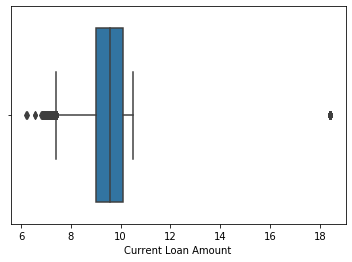

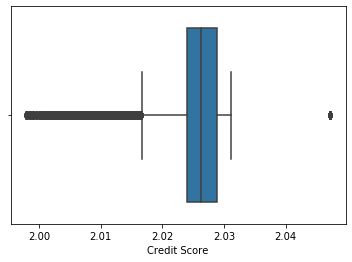

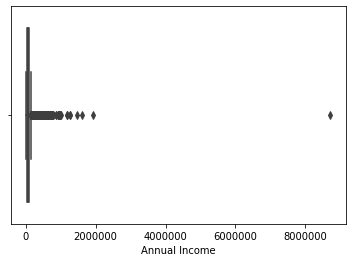

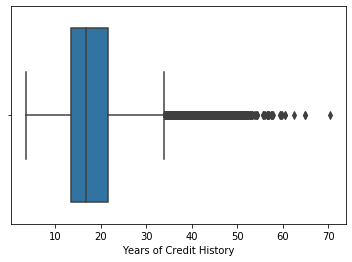

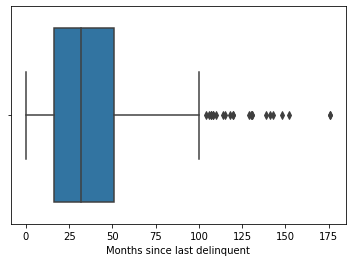

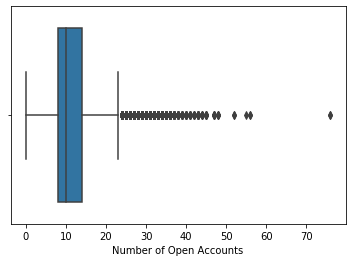

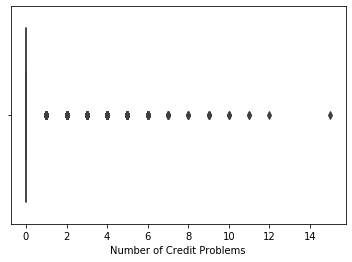

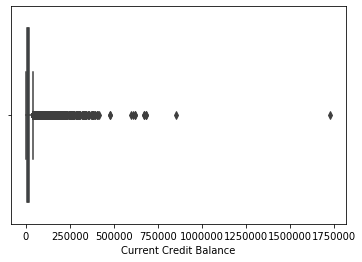

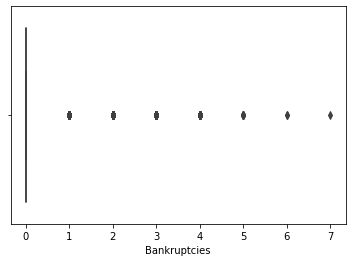

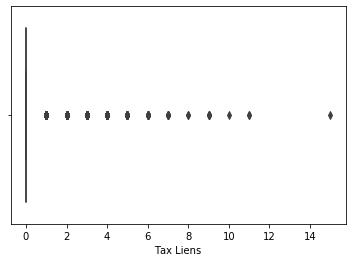

In [194]:
for col in num_cols:
    sns.boxplot(dff[col])
    plt.show()

In [195]:
dfff = dfff.drop(['Loan ID','Customer ID','Months since last delinquent'],axis=1)

In [196]:
dfff.head()

,Loan Status,Current Loan Amount,Term,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Credit Score,Annual Income
0,0,9.411892,0,< 1 year,Rent,Debt Consolidation,6.657228,2.944439,2.564949,0.000000,8.819222,8.980550,0,0,2.04723,10.750300
1,0,10.127231,1,10+ years,Home Mortgage,Debt Consolidation,6.794687,3.321432,2.708050,0.000000,10.483102,11.263977,0,0,2.04723,11.303438
2,0,9.687692,0,9 years,Home Mortgage,Home Improvements,7.126907,2.873565,2.484907,0.693147,9.330432,9.603463,1,0,2.04723,11.009390
3,0,9.368796,0,3 years,Rent,Debt Consolidation,6.899663,2.397895,3.091042,0.000000,8.855093,10.681298,0,0,2.04723,10.439162
4,0,9.189117,1,10+ years,Home Mortgage,Home Improvements,6.223984,2.873565,2.639057,0.693147,9.735897,9.880935,1,0,2.04723,10.757988


In [197]:
num_cols = dfff.select_dtypes(exclude = 'object').columns
print("Count of numerical values are",num_cols.value_counts().sum())

Count of numerical values are 11


In [198]:
num_var = ['Current Loan Amount', 'Monthly Debt',
       'Years of Credit History', 'Number of Open Accounts',
       'Current Credit Balance', 'Maximum Open Credit', 'Credit Score',
       'Annual Income']

### Bivariate Analysis

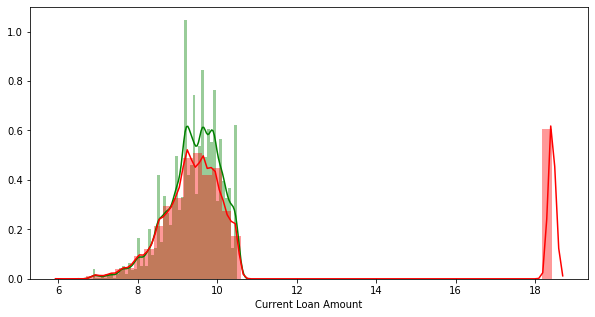

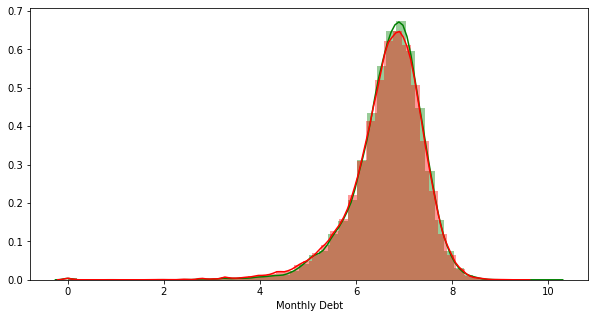

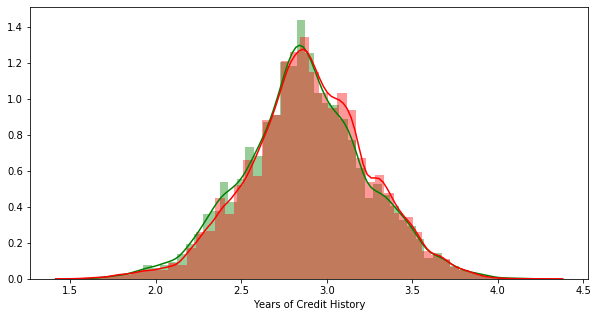

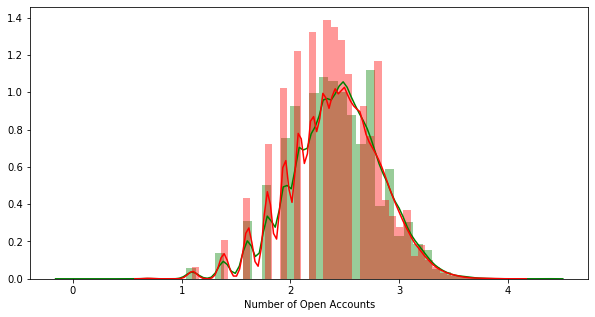

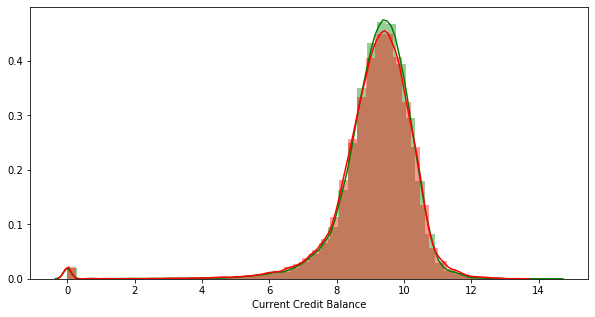

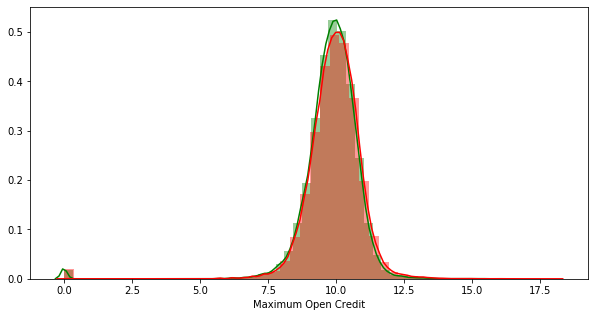

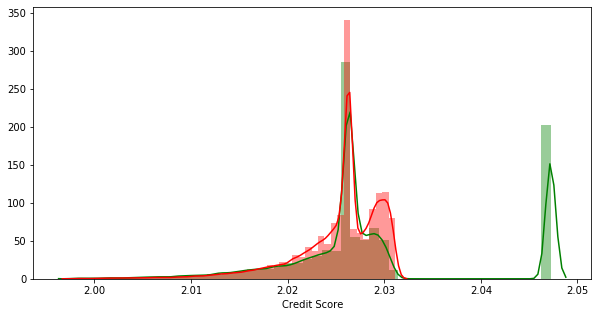

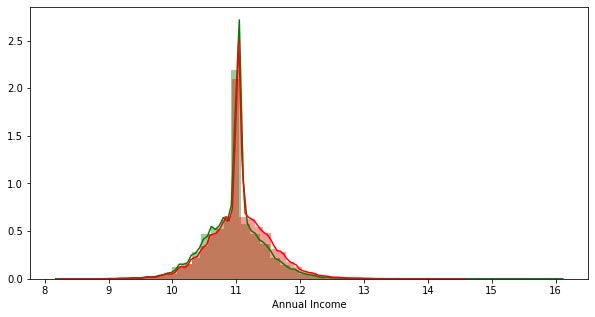

In [199]:
lp0 = dfff[dfff['Loan Status']==0]
lp1 = dfff[dfff['Loan Status']==1]

for i in num_var:
    plt.figure(figsize=(10,5))
    sns.distplot(lp0[i],color='g')
    sns.distplot(lp1[i],color='r')
    plt.show()

In [200]:
from scipy.stats import shapiro , levene , mannwhitneyu , chi2_contingency , chisquare
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon

In [201]:
cat_cols=['Years in current job','Home Ownership','Purpose','Bankruptcies','Tax Liens','Term']

In [202]:
chi_stat=[]
p_value=[]
for i in cat_cols:
    chi_res=stats.chi2_contingency(np.array(pd.crosstab(dfff[i],dfff['Loan Status'])))
    chi_stat.append(chi_res[0])
    p_value.append(chi_res[1])

In [203]:
p_value

[0.03722774544188468,
 1.0945524861632593e-67,
 7.300080869073768e-36,
 0.28626320187784615,
 0.025847191259009597,
 5.275922191927291e-291]

From the chi square test and from the above pvalues the pvalue of 'Bankruptcies' > 0.05 hence it is not significant feature apart from that all other categorical variables are significant since there pvalue is lesser than 0.05

In [204]:
dfff.columns

Index(['Loan Status', 'Current Loan Amount', 'Term', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Credit Score', 'Annual Income'],
      dtype='object')

#### Statistical tests for Numerical variables

In [205]:
no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Current Loan Amount" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Current Loan Amount" ]
print ( shapiro ( dfff [ "Current Loan Amount" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Loan Amount is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Credit Score" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Credit Score" ]
print ( shapiro ( dfff [ "Credit Score" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print(mannwhitneyu ( no, yes))
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Credit Score is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Annual Income" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Annual Income" ]
print ( shapiro ( dfff [ "Annual Income" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Annual Income is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Monthly Debt" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Monthly Debt" ]
print ( shapiro ( dfff [ "Monthly Debt" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Monthly Debt is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Years of Credit History" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Years of Credit History" ]
print ( shapiro ( dfff [ "Years of Credit History" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Years of Years of Credit History is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Number of Open Accounts" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Number of Open Accounts" ]
print ( shapiro ( dfff [ "Number of Open Accounts" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Number of Open Accounts is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Number of Credit Problems" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Number of Credit Problems" ]
print ( shapiro ( dfff [ "Number of Credit Problems" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Years of Number of Credit Problems is not significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Current Credit Balance" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Current Credit Balance" ]
print ( shapiro ( dfff [ "Current Credit Balance" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Credit Balance is significant." )
print ( "\n" )

no = dfff [ dfff [ "Loan Status" ] == 0 ] [ "Maximum Open Credit" ]
yes = dfff [ dfff [ "Loan Status" ] == 1 ] [ "Maximum Open Credit" ]
print ( shapiro ( dfff [ "Maximum Open Credit" ] ) )
print ( "Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal." )
print ( mannwhitneyu ( no , yes ) )
print ( "Since p < 0.05, we reject Ho. Hence, we can conclude that the Maximum Open Credit is significant." )
print ( "\n" )

(0.5838179588317871, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=975312301.5, pvalue=3.4888300978058134e-125)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Current Loan Amount is significant.


(0.7837085127830505, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=943123335.5, pvalue=1.9189059589009544e-212)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Credit Score is significant.


(0.9702830910682678, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=968923459.0, pvalue=3.556792826820446e-141)
Since p < 0.05, we reject Ho. Hence, we can conclude that the Annual Income is significant.


(0.9230990409851074, 0.0)
Since p < 0.05, we reject Ho. Hence, the distribution followed is not normal.
MannwhitneyuResult(statistic=1063205158.0, pvalue=1.9607003018434183e-05)
Si

Here we could infer that all numerical columns are significant

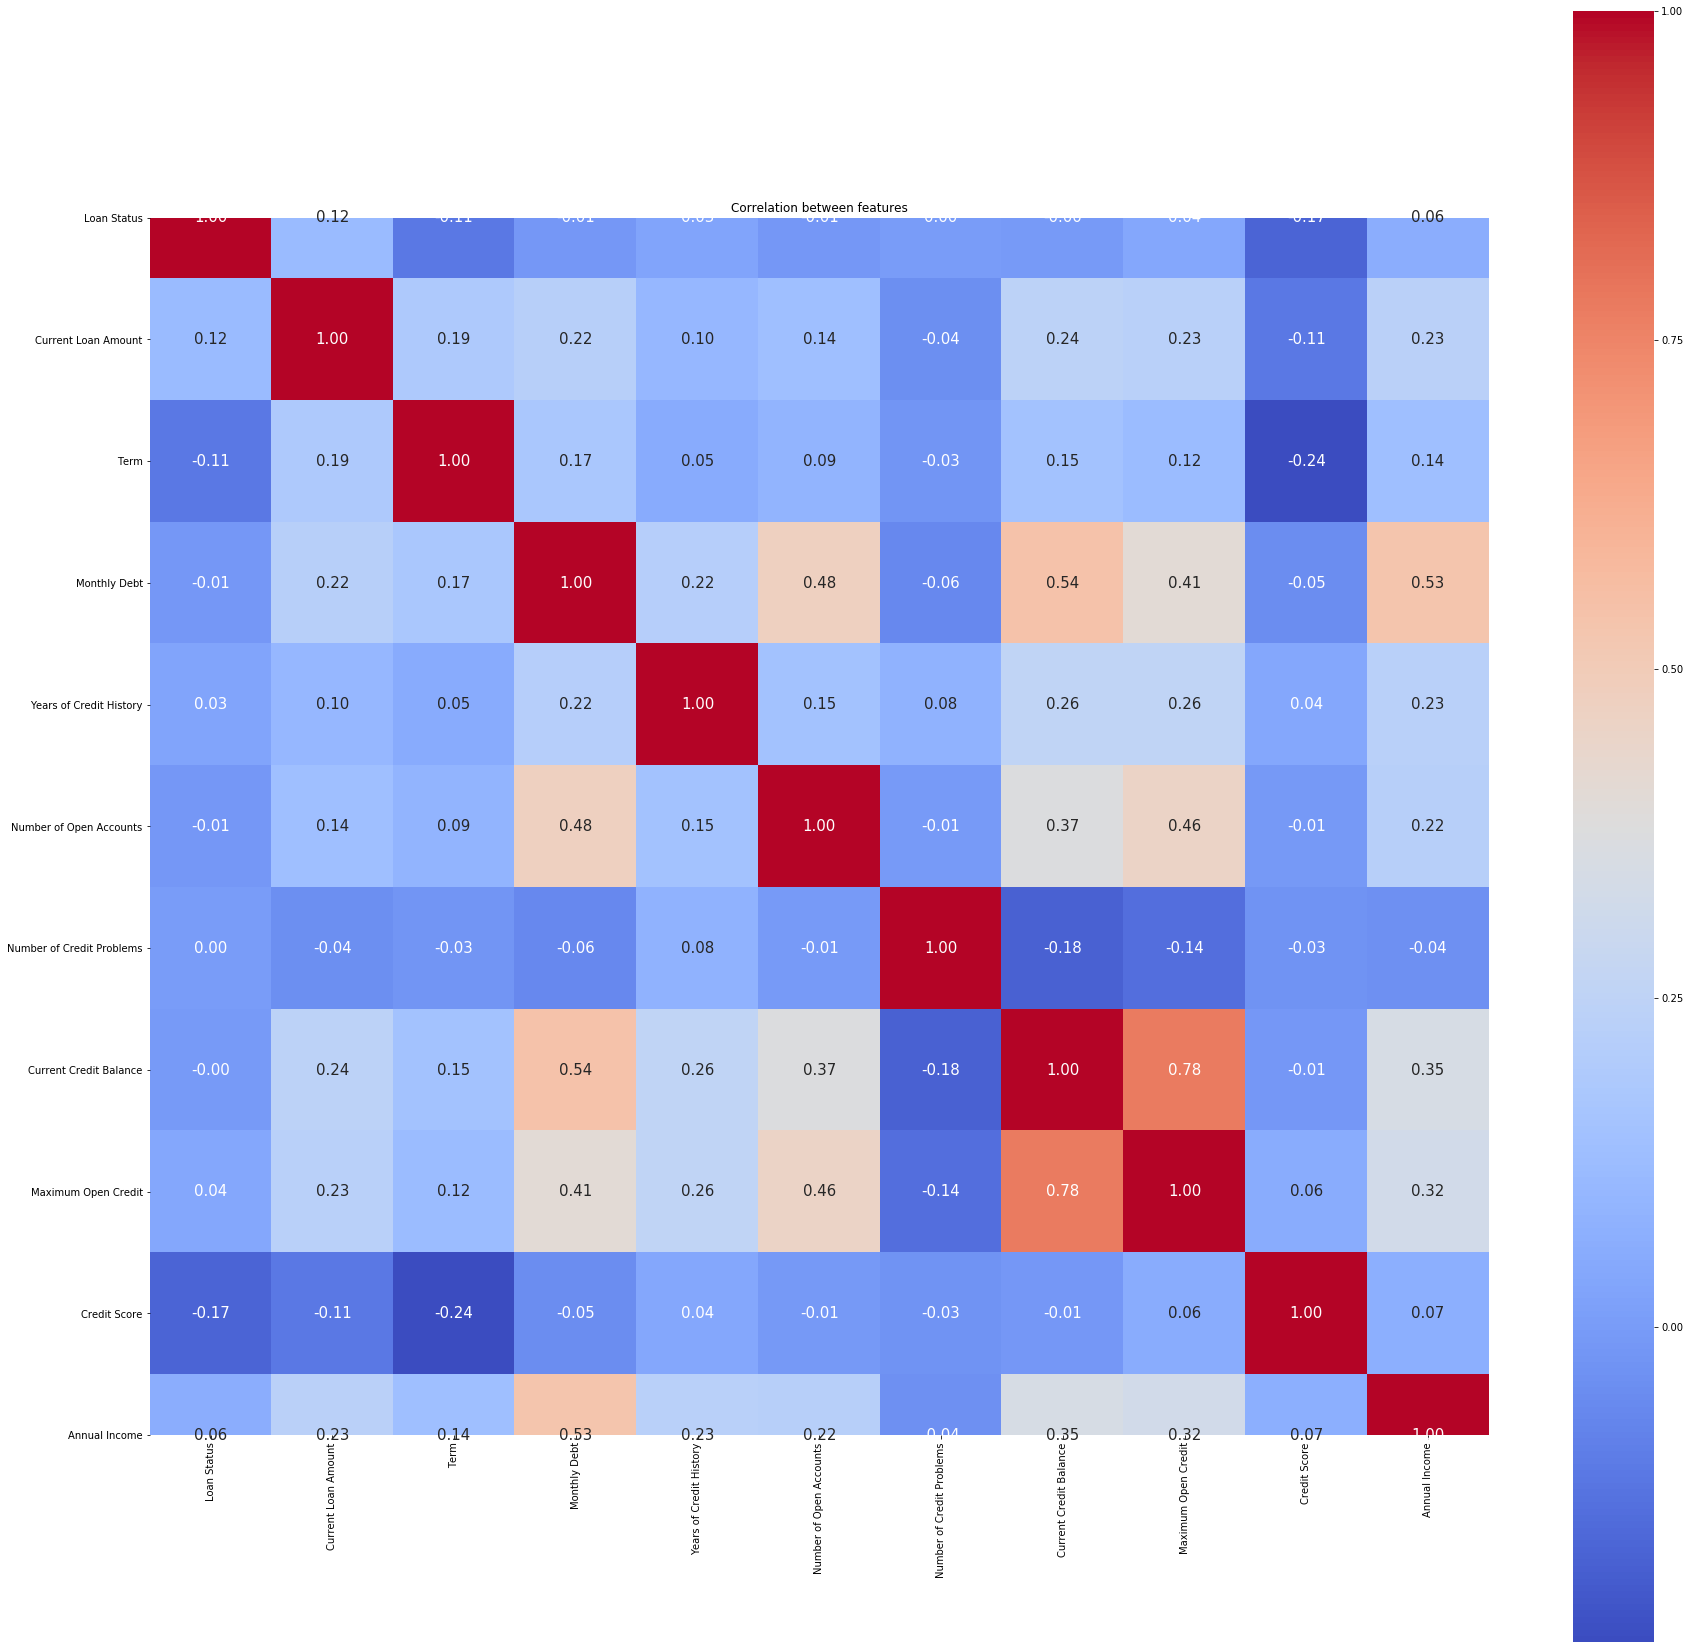

In [206]:
plt.figure(figsize=(30, 30))
sns.heatmap(result.corr(), cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [207]:
dfff=pd.get_dummies(data=result,columns=['Years in current job','Home Ownership','Purpose','Tax Liens'],drop_first=True)

In [208]:
dfff.head()

,Loan Status,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,...,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
0,0,2.628870,0,29.582577,3.232674,3.138639,0.000000,35.489959,24.372832,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.648463,1,31.284662,3.691188,3.352527,0.000000,57.337438,40.890921,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.637041,0,35.778495,3.147673,3.021021,0.107394,41.206149,28.177362,1,...,0,0,0,0,0,0,0,0,0,0
3,0,2.627516,0,32.644751,2.586833,3.948466,0.000000,35.866201,35.955078,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2.621635,1,24.756381,3.147673,3.248823,0.107394,46.326224,30.026383,1,...,0,0,0,0,0,0,0,0,0,0


In [209]:
dfff.shape

(111107, 50)

In [210]:
dfff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 50 columns):
Loan Status                       111107 non-null int64
Current Loan Amount               111107 non-null float64
Term                              111107 non-null int64
Monthly Debt                      111107 non-null float64
Years of Credit History           111107 non-null float64
Number of Open Accounts           111107 non-null float64
Number of Credit Problems         111107 non-null float64
Current Credit Balance            111107 non-null float64
Maximum Open Credit               111107 non-null float64
Bankruptcies                      111107 non-null object
Credit Score                      111107 non-null float64
Annual Income                     111107 non-null float64
Years in current job_10+ years    111107 non-null uint8
Years in current job_2 years      111107 non-null uint8
Years in current job_3 years      111107 non-null uint8
Years in current job_4 years  

In [211]:
from sklearn.model_selection import train_test_split
X=dfff.drop(['Loan Status','Bankruptcies'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [212]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.492230
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.078     
Dependent Variable:          Loan Status             AIC:                     76661.4005
Date:                        2020-08-30 18:39        BIC:                     77105.9555
No. Observations:            77774                   Log-Likelihood:          -38283.   
Df Model:                    47                      LL-Null:                 -41543.   
Df Residuals:                77726                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|     [0.025     0

In [213]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
res = GLM(y_train, X_train,
          family=families.Binomial()).fit(attach_wls=True, atol=1e-10)
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan Status   No. Observations:                77774
Model:                            GLM   Df Residuals:                    77726
Model Family:                Binomial   Df Model:                           47
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38283.
Date:                Sun, 30 Aug 2020   Deviance:                       76565.
Time:                        18:39:55   Pearson chi2:                 8.09e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Current Loan

In [214]:
infl = res.get_influence(observed=False)

In [215]:
summ_df = infl.summary_frame()
summ_df.sort_values('cooks_d', ascending=False)[:10]

,dfb_Current Loan Amount,dfb_Term,dfb_Monthly Debt,dfb_Years of Credit History,dfb_Number of Open Accounts,dfb_Number of Credit Problems,dfb_Current Credit Balance,dfb_Maximum Open Credit,dfb_Credit Score,dfb_Annual Income,...,dfb_Tax Liens_7.0,dfb_Tax Liens_8.0,dfb_Tax Liens_9.0,dfb_Tax Liens_10.0,dfb_Tax Liens_11.0,dfb_Tax Liens_15.0,cooks_d,standard_resid,hat_diag,dffits_internal
74634,0.012596,0.010616,-0.009323,0.002344,-0.001214,-0.001653,-0.002691,0.003933,0.009712,-0.016568,...,4.439227e-04,1.982499e-09,-1.363921,-9.568511e-10,-7.495581e-10,-6.600618e-10,0.038841,-2.141181,0.289093,-1.365417
67606,-0.009127,0.006801,-0.008666,-0.002582,0.023542,0.000091,0.012585,-0.013423,0.003178,0.005947,...,-9.269996e-05,1.873836e-09,-0.000201,6.229276e-10,-3.451148e-10,-2.948078e-11,0.026494,-3.525695,0.092811,-1.127709
20008,-0.000806,-0.001698,0.005649,0.007522,0.000474,-0.001787,-0.005894,0.003072,0.010439,-0.006510,...,1.329936e-04,6.266157e-10,1.070070,5.242326e-10,1.537421e-09,-7.864115e-10,0.023891,1.305940,0.402059,1.070876
74385,-0.005989,0.006816,-0.000975,0.003591,-0.003287,-0.001764,-0.002485,-0.000507,0.004635,0.003801,...,-8.453254e-01,3.042638e-10,-0.000017,1.805558e-10,1.964397e-11,2.970769e-11,0.014923,-1.499577,0.241580,-0.846340
100624,-0.004558,0.010210,-0.002756,-0.004107,0.001551,0.000309,-0.004000,0.000725,-0.000529,0.006605,...,7.568435e-01,-6.184476e-10,-0.000077,-2.116922e-10,4.988473e-10,2.481936e-10,0.011964,1.291015,0.256251,0.757794
9826,0.002531,-0.002762,0.001793,-0.000337,-0.004389,0.000716,0.003361,0.000561,-0.003534,-0.000842,...,6.353593e-01,4.000988e-10,-0.000010,-9.132340e-12,-9.212572e-10,-6.234936e-10,0.008475,1.080092,0.258555,0.637820
77902,0.018345,0.004696,0.011317,-0.006508,0.009382,0.002689,0.019743,-0.023287,0.009804,-0.020159,...,9.513238e-07,8.411133e-10,0.000160,7.936485e-10,1.583899e-10,5.693182e-10,0.007549,-2.614427,0.050345,-0.601964
50644,0.004520,0.008163,0.006195,-0.002411,-0.002584,-0.000797,-0.002428,-0.002681,0.012184,-0.007654,...,8.136858e-05,1.101181e-09,0.000030,2.683555e-10,-1.850888e-10,1.684298e-10,0.006179,-1.762792,0.087136,-0.544624
927,0.002535,0.000826,0.000153,-0.005419,-0.000667,0.001909,0.001524,0.001311,-0.006231,0.001716,...,-5.219175e-01,-2.847691e-10,-0.000053,-2.694905e-10,-4.459676e-10,-3.760336e-10,0.005696,-0.914986,0.246188,-0.522897
106862,0.004586,0.004456,-0.006324,-0.003596,-0.000672,0.000496,0.002538,-0.000496,-0.002878,-0.001642,...,6.801956e-05,2.848116e-10,0.478073,-6.168746e-10,-1.136677e-09,2.402483e-10,0.004770,0.714112,0.309862,0.478501


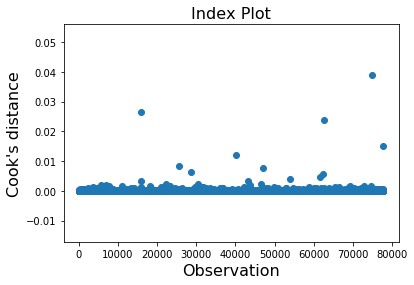

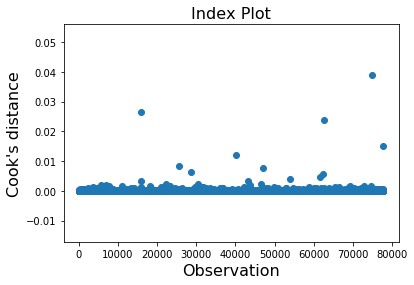

In [216]:
infl.plot_index(y_var='cooks', threshold=2 * infl.cooks_distance[0].mean())

In [217]:
pd.set_option('display.max_columns',None)

In [218]:
Xc =sm.add_constant(X)

In [219]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_others,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.163454,1.130496,2.10015,1.206236,1.507297,1.21144,3.225907,2.96756,1.118699,1.569875,2.809653,1.711819,1.648607,1.497008,1.543389,1.459896,1.453894,1.377912,1.326428,1.639901,1.107715,1.268965,1.425939,1.796545,11.058339,1.066499,4.484625,1.706819,1.354946,1.229855,1.095851,6.267174,1.006578,1.179027,1.062087,1.071584,1.100714,1.028616,1.009317,1.0053,1.00175,1.001178,1.00126,1.000512,1.00055,1.000143,1.000445,1.000222


From the Above Muliticollinearity test the column 'Home Ownership_Home Mortgage' VIF is 191.57 which is high lets try removing it check for the result again

In [220]:
X=dfff.drop(['Loan Status','Bankruptcies','Purpose_Debt Consolidation','Number of Credit Problems'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [221]:
Xc =sm.add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_others,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.162633,1.130292,2.098131,1.187782,1.500298,3.173364,2.960462,1.11414,1.564051,2.809405,1.711039,1.648104,1.49683,1.543044,1.459802,1.453866,1.377912,1.326391,1.638824,1.107685,1.268721,1.009186,1.016026,1.002527,1.072621,1.011568,1.009305,1.005219,1.002798,1.070455,1.000442,1.002959,1.002232,1.001521,1.003395,1.001513,1.000988,1.001121,1.000417,1.000415,1.00078,1.000378,1.000219,1.000082,1.000299,1.000148


Now every column's VIF value is less than 5

In [222]:
X=dfff.drop(['Loan Status','Bankruptcies','Purpose_Debt Consolidation','Number of Credit Problems'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [223]:
Xc =sm.add_constant(X)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,Current Loan Amount,Term,Monthly Debt,Years of Credit History,Number of Open Accounts,Current Credit Balance,Maximum Open Credit,Credit Score,Annual Income,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Buy House,Purpose_Buy a Car,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_others,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Tax Liens_1.0,Tax Liens_2.0,Tax Liens_3.0,Tax Liens_4.0,Tax Liens_5.0,Tax Liens_6.0,Tax Liens_7.0,Tax Liens_8.0,Tax Liens_9.0,Tax Liens_10.0,Tax Liens_11.0,Tax Liens_15.0
vif,1.162633,1.130292,2.098131,1.187782,1.500298,3.173364,2.960462,1.11414,1.564051,2.809405,1.711039,1.648104,1.49683,1.543044,1.459802,1.453866,1.377912,1.326391,1.638824,1.107685,1.268721,1.009186,1.016026,1.002527,1.072621,1.011568,1.009305,1.005219,1.002798,1.070455,1.000442,1.002959,1.002232,1.001521,1.003395,1.001513,1.000988,1.001121,1.000417,1.000415,1.00078,1.000378,1.000219,1.000082,1.000299,1.000148


Let's Build the Model!

In [224]:
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.492637
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.078     
Dependent Variable:          Loan Status             AIC:                     76720.7436
Date:                        2020-08-30 18:42        BIC:                     77146.7755
No. Observations:            77774                   Log-Likelihood:          -38314.   
Df Model:                    45                      LL-Null:                 -41543.   
Df Residuals:                77728                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                                Coef.   Std.Err.     z     P>|z|     [0.025     0

confusion matrix - Train 
 [[ 2153 15408]
 [ 1319 58894]]
Overall accuracy - Train 
 0.784928125080361
AUC-Train 
 0.677427697208384
confusion matrix - Test 
 [[  959  6653]
 [  567 25154]]
Overall accuracy - Test 
 0.7833978339783397
AUC-Test 
 0.6822297693326359


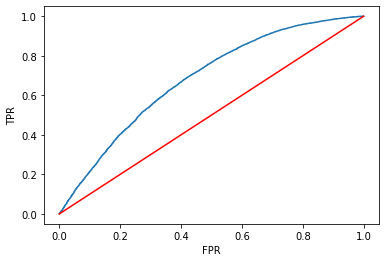

classification report - Train 
               precision    recall  f1-score   support

           0       0.62      0.12      0.20     17561
           1       0.79      0.98      0.88     60213

    accuracy                           0.78     77774
   macro avg       0.71      0.55      0.54     77774
weighted avg       0.75      0.78      0.72     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.63      0.13      0.21      7612
           1       0.79      0.98      0.87     25721

    accuracy                           0.78     33333
   macro avg       0.71      0.55      0.54     33333
weighted avg       0.75      0.78      0.72     33333



In [225]:
lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

In [226]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['Current Loan Amount', 'Term', 'Monthly Debt', 'Years of Credit History', 'Number of Open Accounts', 'Current Credit Balance', 'Maximum Open Credit', 'Credit Score', 'Annual Income', 'Years in current job_10+ years', 'Years in current job_2 years', 'Years in current job_3 years', 'Years in current job_4 years', 'Years in current job_5 years', 'Years in current job_6 years', 'Years in current job_7 years', 'Years in current job_8 years', 'Years in current job_9 years', 'Years in current job_< 1 year', 'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House', 'Purpose_Buy a Car', 'Purpose_Medical Bills', 'Purpose_moving', 'Purpose_small_business', 'Tax Liens_1.0', 'Tax Liens_2.0', 'Tax Liens_3.0', 'Tax Liens_4.0', 'Tax Liens_5.0']


In [227]:
len(selected_features_BE)

31

In [228]:
X=dfff[selected_features_BE]
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

confusion matrix - Train 
 [[ 2126 15435]
 [ 1273 58940]]
Overall accuracy - Train 
 0.7851724226605292
AUC-Train 
 0.6815715358286674
confusion matrix - Test 
 [[  938  6674]
 [  539 25182]]
Overall accuracy - Test 
 0.7836078360783608
AUC-Test 
 0.6842534607234758


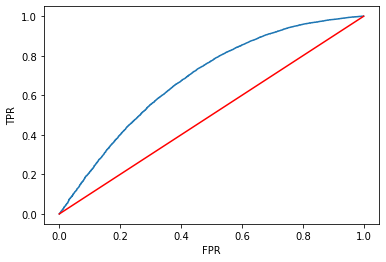

classification report - Train 
               precision    recall  f1-score   support

           0       0.63      0.12      0.20     17561
           1       0.79      0.98      0.88     60213

    accuracy                           0.79     77774
   macro avg       0.71      0.55      0.54     77774
weighted avg       0.75      0.79      0.72     77774

classification report - Test 
                precision    recall  f1-score   support

           0       0.64      0.12      0.21      7612
           1       0.79      0.98      0.87     25721

    accuracy                           0.78     33333
   macro avg       0.71      0.55      0.54     33333
weighted avg       0.76      0.78      0.72     33333



In [229]:
lr = LogisticRegression(fit_intercept = True, solver='liblinear')
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_train_prob = lr.predict_proba(X_train)
y_train_prob = lr.predict_proba(X_train)[:,1]
print('confusion matrix - Train \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)[:,1]
print('confusion matrix - Test \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test \n',roc_auc_score(y_test,y_test_prob))

fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('classification report - Train \n', classification_report(y_train,y_train_pred))
print('classification report - Test \n ', classification_report(y_test,y_test_pred))

#### Scaling the data

In [230]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

confusion matrix - Train : 
 [[17561     0]
 [    0 60213]]
Overall accuracy - Train: 
 1.0
AUC-Train: 
 1.0


confusion matrix - Test: 
 [[ 1666  5946]
 [  578 25143]]
Overall accuracy - Test: 
 0.8042780427804278
AUC-Test: 
 0.7919133089762709


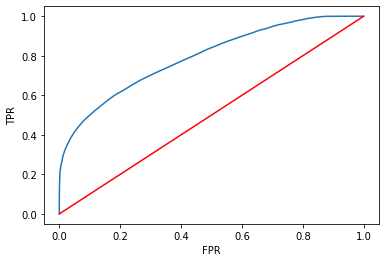



classification report - Train                precision    recall  f1-score   support

           0       1.00      1.00      1.00     17561
           1       1.00      1.00      1.00     60213

    accuracy                           1.00     77774
   macro avg       1.00      1.00      1.00     77774
weighted avg       1.00      1.00      1.00     77774

classification report - Test                precision    recall  f1-score   support

           0       0.74      0.22      0.34      7612
           1       0.81      0.98      0.89     25721

    accuracy                           0.80     33333
   macro avg       0.78      0.60      0.61     33333
weighted avg       0.79      0.80      0.76     33333



In [231]:
rfc = RandomForestClassifier(n_estimators=100,random_state=3)
rfc.fit(X_trains,y_train)
y_train_pred = rfc.predict(X_trains)
y_train_prob = rfc.predict_proba(X_trains)[:,1]
print('confusion matrix - Train : \n',confusion_matrix(y_train,y_train_pred))
print('Overall accuracy - Train: \n',accuracy_score(y_train,y_train_pred))
print('AUC-Train: \n',roc_auc_score(y_train,y_train_prob))

y_test_pred = rfc.predict(X_tests)
y_test_prob = rfc.predict_proba(X_tests)[:,1]
print('\n')
print('confusion matrix - Test: \n',confusion_matrix(y_test,y_test_pred))
print('Overall accuracy - Test: \n',accuracy_score(y_test,y_test_pred))
print('AUC-Test: \n',roc_auc_score(y_test,y_test_prob))
fpr,tpr, thresholds = roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

print('\n')
print('classification report - Train ', classification_report(y_train,y_train_pred))
print('classification report - Test ', classification_report(y_test,y_test_pred))

In [232]:
from sklearn.utils import resample

upsample_data = dfff

majority = upsample_data[upsample_data["Loan Status"]==0]
minority = upsample_data[upsample_data["Loan Status"]==1]

minority_upsampled = resample(minority, replace=True,random_state=42) 
del(upsample_data)
upsample_data = pd.concat([majority,minority_upsampled])

In [233]:
upsample_data["Loan Status"].value_counts()

1    85934
0    25173
Name: Loan Status, dtype: int64

In [234]:
X=dfff.drop(['Loan Status','Bankruptcies','Purpose_Debt Consolidation','Number of Credit Problems'],axis=1)
y=dfff['Loan Status']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [235]:
lr = LogisticRegression(solver = 'liblinear')

In [236]:
def model_eval(algo, Xtrain, Xtest, ytrain, ytest):

    algo.fit(Xtrain, ytrain)

    ytrain_pred = algo.predict(Xtrain)
    ytrain_prob = algo.predict_proba(Xtrain)[:,1]

    print('Confusion Matrix - Train: \n', confusion_matrix(ytrain, ytrain_pred))
    print('\n')
    print('Overall Accuracy - Train: \n', accuracy_score(ytrain, ytrain_pred))
    print('AUC - Train: \n', roc_auc_score(ytrain, ytrain_prob))

    ytest_pred = algo.predict(Xtest)
    ytest_prob = algo.predict_proba(Xtest)[:,1]

    print('\n')
    print('Confusion Matrix - Test: \n', confusion_matrix(ytest, ytest_pred))
    print('\n')
    print('Overall Accuracy - Test: \n', accuracy_score(ytest, ytest_pred))
    print('AUC - Test: ', roc_auc_score(ytest, ytest_prob))
    
    fpr, tpr, threasholds = roc_curve(ytest, ytest_prob)
    plt.plot(fpr, tpr, 'c')
    plt.plot(fpr, fpr, 'r')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    
    print('classification report - Train \n', classification_report(ytrain,ytrain_pred))
    print('classification report - Test \n ', classification_report(ytest,ytest_pred))

In [237]:
smote = SMOTE(sampling_strategy = 'minority', random_state = 3)

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [238]:
y_train_sm.value_counts()

1    60213
0    60213
Name: Loan Status, dtype: int64

Confusion Matrix - Train: 
 [[42641 17572]
 [10351 49862]]


Overall Accuracy - Train: 
 0.7681314666268082
AUC - Train: 
 0.8321841940652752


Confusion Matrix - Test: 
 [[ 2465  5147]
 [ 4420 21301]]


Overall Accuracy - Test: 
 0.7129871298712988
AUC - Test:  0.628284070895122


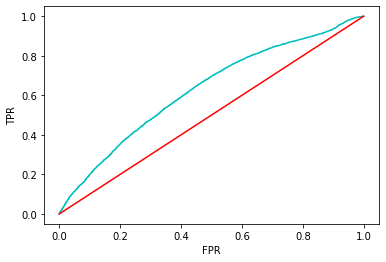

classification report - Train 
               precision    recall  f1-score   support

           0       0.80      0.71      0.75     60213
           1       0.74      0.83      0.78     60213

    accuracy                           0.77    120426
   macro avg       0.77      0.77      0.77    120426
weighted avg       0.77      0.77      0.77    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.36      0.32      0.34      7612
           1       0.81      0.83      0.82     25721

    accuracy                           0.71     33333
   macro avg       0.58      0.58      0.58     33333
weighted avg       0.70      0.71      0.71     33333



In [239]:
model_eval(lr, X_train_sm, X_test, y_train_sm, y_test)

Confusion Matrix - Train: 
 [[60213     0]
 [    1 60212]]


Overall Accuracy - Train: 
 0.9999916961453507
AUC - Train: 
 1.0


Confusion Matrix - Test: 
 [[ 2675  4937]
 [ 2598 23123]]


Overall Accuracy - Test: 
 0.7739477394773948
AUC - Test:  0.7705611596144186


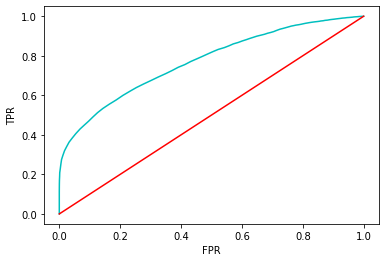

classification report - Train 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     60213
           1       1.00      1.00      1.00     60213

    accuracy                           1.00    120426
   macro avg       1.00      1.00      1.00    120426
weighted avg       1.00      1.00      1.00    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.51      0.35      0.42      7612
           1       0.82      0.90      0.86     25721

    accuracy                           0.77     33333
   macro avg       0.67      0.63      0.64     33333
weighted avg       0.75      0.77      0.76     33333



In [240]:
rfc = RandomForestClassifier(n_estimators=100,random_state=3)
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

Confusion Matrix - Train: 
 [[45895 14318]
 [11182 49031]]


Overall Accuracy - Train: 
 0.7882517064421304
AUC - Train: 
 0.8646739127498242


Confusion Matrix - Test: 
 [[ 3166  4446]
 [ 4799 20922]]


Overall Accuracy - Test: 
 0.7226472264722648
AUC - Test:  0.6836752518736415


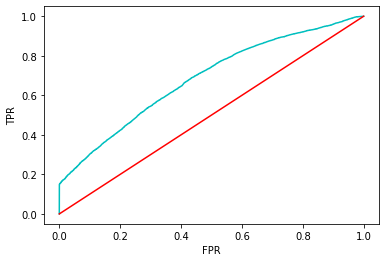

classification report - Train 
               precision    recall  f1-score   support

           0       0.80      0.76      0.78     60213
           1       0.77      0.81      0.79     60213

    accuracy                           0.79    120426
   macro avg       0.79      0.79      0.79    120426
weighted avg       0.79      0.79      0.79    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.40      0.42      0.41      7612
           1       0.82      0.81      0.82     25721

    accuracy                           0.72     33333
   macro avg       0.61      0.61      0.61     33333
weighted avg       0.73      0.72      0.72     33333



In [241]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 3)
model_eval(ada, X_train_sm, X_test, y_train_sm, y_test)

#### hyper parameter tuning the RF

In [242]:
from scipy.stats import randint as sp_randint
rfc = RandomForestClassifier(random_state=3)
params = {'n_estimators':sp_randint(50,200),
         'max_features': sp_randint(1,24),
         'max_depth':sp_randint(2,10),
         'min_samples_split':sp_randint(2,20),
         'min_samples_leaf':sp_randint(1,20),
         'criterion':['gini','entropy']}
rsearch_rfc = RandomizedSearchCV(rfc,param_distributions = params,n_iter=100,scoring = 'roc_auc',n_jobs=-1,random_state=3,return_train_score=True)
rsearch_rfc.fit(Xs,y)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [243]:
rsearch_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 13,
 'n_estimators': 169}

Confusion Matrix - Train: 
 [[46284 13929]
 [13654 46559]]


Overall Accuracy - Train: 
 0.7709547772075798
AUC - Train: 
 0.8297073024606942


Confusion Matrix - Test: 
 [[ 3674  3938]
 [ 5995 19726]]


Overall Accuracy - Test: 
 0.7020070200702007
AUC - Test:  0.6895779221727768


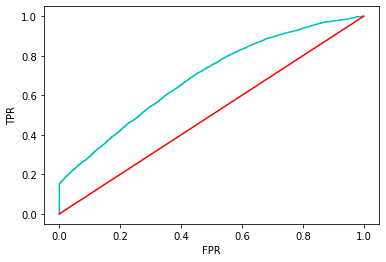

classification report - Train 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77     60213
           1       0.77      0.77      0.77     60213

    accuracy                           0.77    120426
   macro avg       0.77      0.77      0.77    120426
weighted avg       0.77      0.77      0.77    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.38      0.48      0.43      7612
           1       0.83      0.77      0.80     25721

    accuracy                           0.70     33333
   macro avg       0.61      0.62      0.61     33333
weighted avg       0.73      0.70      0.71     33333



In [244]:
rfc = RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

#### LGBM

Confusion Matrix - Train: 
 [[47135 13078]
 [ 4529 55684]]


Overall Accuracy - Train: 
 0.8537940311892781
AUC - Train: 
 0.9261811350765351


Confusion Matrix - Test: 
 [[ 2291  5321]
 [ 2045 23676]]


Overall Accuracy - Test: 
 0.7790177901779017
AUC - Test:  0.7366442701577417


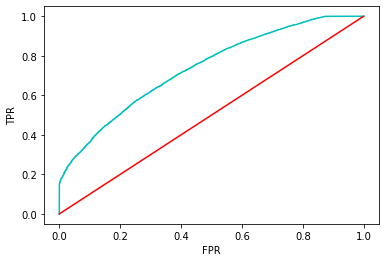

classification report - Train 
               precision    recall  f1-score   support

           0       0.91      0.78      0.84     60213
           1       0.81      0.92      0.86     60213

    accuracy                           0.85    120426
   macro avg       0.86      0.85      0.85    120426
weighted avg       0.86      0.85      0.85    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.53      0.30      0.38      7612
           1       0.82      0.92      0.87     25721

    accuracy                           0.78     33333
   macro avg       0.67      0.61      0.62     33333
weighted avg       0.75      0.78      0.76     33333



In [245]:
lgbm = lgb.LGBMClassifier()
model_eval(lgbm, X_train_sm, X_test, y_train_sm, y_test)

#### hyper tuning LGBM

In [246]:
lgbm = lgb.LGBMClassifier()
from scipy.stats import uniform as sp_uniform
params = {'n_estimators': sp_randint(50,200),
         'max_depth': sp_randint(2,15),
         'learning_rate':sp_uniform(0.001,0.5),
         'num_leaves': sp_randint(20,50)}

rsearch = RandomizedSearchCV(lgbm, param_distributions = params, cv=3, n_iter=100,n_jobs=-1,random_state=3)

rsearch.fit(Xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020914A564C

Confusion Matrix - Train: 
 [[43704 16509]
 [ 9423 50790]]


Overall Accuracy - Train: 
 0.7846644412336207
AUC - Train: 
 0.8566170939493664


Confusion Matrix - Test: 
 [[ 3070  4542]
 [ 4005 21716]]


Overall Accuracy - Test: 
 0.7435874358743587
AUC - Test:  0.6906557345432555


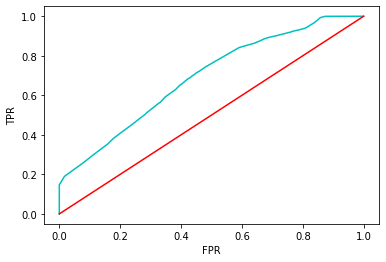

classification report - Train 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77     60213
           1       0.75      0.84      0.80     60213

    accuracy                           0.78    120426
   macro avg       0.79      0.78      0.78    120426
weighted avg       0.79      0.78      0.78    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.43      0.40      0.42      7612
           1       0.83      0.84      0.84     25721

    accuracy                           0.74     33333
   macro avg       0.63      0.62      0.63     33333
weighted avg       0.74      0.74      0.74     33333



In [247]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
model_eval(lgbm, X_train_sm, X_test, y_train_sm, y_test)

#### Stacking

In [248]:
from sklearn.ensemble import VotingClassifier
rfc = RandomForestClassifier(**rsearch_rfc.best_params_)
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
ada = AdaBoostClassifier(random_state = 3)

Confusion Matrix - Train: 
 [[45905 14308]
 [12359 47854]]


Overall Accuracy - Train: 
 0.7785611080663644
AUC - Train: 
 0.8540017918039441


Confusion Matrix - Test: 
 [[ 3499  4113]
 [ 5423 20298]]


Overall Accuracy - Test: 
 0.7139171391713918
AUC - Test:  0.6971472578446638


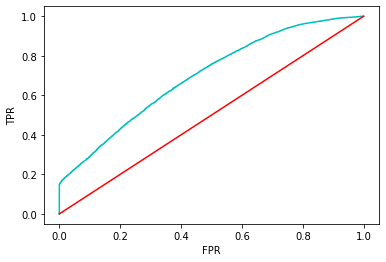

classification report - Train 
               precision    recall  f1-score   support

           0       0.79      0.76      0.77     60213
           1       0.77      0.79      0.78     60213

    accuracy                           0.78    120426
   macro avg       0.78      0.78      0.78    120426
weighted avg       0.78      0.78      0.78    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.39      0.46      0.42      7612
           1       0.83      0.79      0.81     25721

    accuracy                           0.71     33333
   macro avg       0.61      0.62      0.62     33333
weighted avg       0.73      0.71      0.72     33333



In [249]:
clf=VotingClassifier(estimators=[('rfc',rfc),('lgbm',lgbm),('ada',ada)],weights=[2,3,1],voting='soft')
model_eval(clf, X_train_sm, X_test, y_train_sm, y_test)

In [250]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

Confusion Matrix - Train: 
 [[57055  3158]
 [47861 12352]]


Overall Accuracy - Train: 
 0.5763456396459237
AUC - Train: 
 0.7952505409586953


Confusion Matrix - Test: 
 [[ 6339  1273]
 [20491  5230]]


Overall Accuracy - Test: 
 0.34707347073470735
AUC - Test:  0.5358021072684178


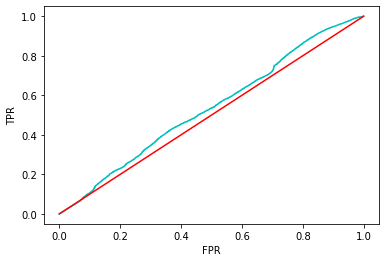

classification report - Train 
               precision    recall  f1-score   support

           0       0.54      0.95      0.69     60213
           1       0.80      0.21      0.33     60213

    accuracy                           0.58    120426
   macro avg       0.67      0.58      0.51    120426
weighted avg       0.67      0.58      0.51    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.24      0.83      0.37      7612
           1       0.80      0.20      0.32     25721

    accuracy                           0.35     33333
   macro avg       0.52      0.52      0.35     33333
weighted avg       0.67      0.35      0.33     33333



In [251]:
gnb = GaussianNB()
model_eval(gnb, X_train_sm, X_test, y_train_sm, y_test)

Confusion Matrix - Train: 
 [[41420 18793]
 [14837 45376]]


Overall Accuracy - Train: 
 0.720741368143092
AUC - Train: 
 0.7830271083206795


Confusion Matrix - Test: 
 [[ 1910  5702]
 [ 6526 19195]]


Overall Accuracy - Test: 
 0.6331563315633156
AUC - Test:  0.5011469099790521


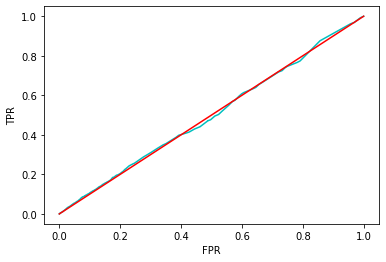

classification report - Train 
               precision    recall  f1-score   support

           0       0.74      0.69      0.71     60213
           1       0.71      0.75      0.73     60213

    accuracy                           0.72    120426
   macro avg       0.72      0.72      0.72    120426
weighted avg       0.72      0.72      0.72    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.23      0.25      0.24      7612
           1       0.77      0.75      0.76     25721

    accuracy                           0.63     33333
   macro avg       0.50      0.50      0.50     33333
weighted avg       0.65      0.63      0.64     33333



In [252]:
bnb = BernoulliNB()
model_eval(bnb, X_train_sm, X_test, y_train_sm, y_test)

Confusion Matrix - Train: 
 [[58793  1420]
 [19036 41177]]


Overall Accuracy - Train: 
 0.830136349293342
AUC - Train: 
 0.9644042043010336


Confusion Matrix - Test: 
 [[ 4649  2963]
 [11025 14696]]


Overall Accuracy - Test: 
 0.5803558035580356
AUC - Test:  0.6161999597401789


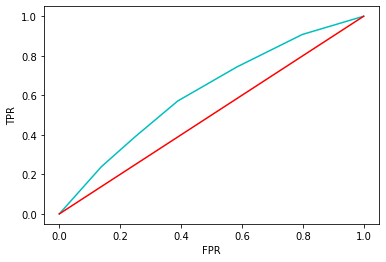

classification report - Train 
               precision    recall  f1-score   support

           0       0.76      0.98      0.85     60213
           1       0.97      0.68      0.80     60213

    accuracy                           0.83    120426
   macro avg       0.86      0.83      0.83    120426
weighted avg       0.86      0.83      0.83    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.30      0.61      0.40      7612
           1       0.83      0.57      0.68     25721

    accuracy                           0.58     33333
   macro avg       0.56      0.59      0.54     33333
weighted avg       0.71      0.58      0.61     33333



In [253]:
knn = KNeighborsClassifier()
model_eval(knn, X_train_sm, X_test, y_train_sm, y_test)

In [254]:
from sklearn import model_selection

import lightgbm as lgm

import xgboost as xgb

from lightgbm import LGBMClassifier

from xgboost import XGBClassifier

Confusion Matrix - Train: 
 [[58793  1420]
 [19036 41177]]


Overall Accuracy - Train: 
 0.830136349293342
AUC - Train: 
 0.9644042043010336


Confusion Matrix - Test: 
 [[ 4649  2963]
 [11025 14696]]


Overall Accuracy - Test: 
 0.5803558035580356
AUC - Test:  0.6161999597401789


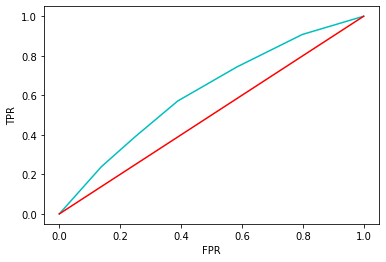

classification report - Train 
               precision    recall  f1-score   support

           0       0.76      0.98      0.85     60213
           1       0.97      0.68      0.80     60213

    accuracy                           0.83    120426
   macro avg       0.86      0.83      0.83    120426
weighted avg       0.86      0.83      0.83    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.30      0.61      0.40      7612
           1       0.83      0.57      0.68     25721

    accuracy                           0.58     33333
   macro avg       0.56      0.59      0.54     33333
weighted avg       0.71      0.58      0.61     33333



In [255]:
xgbm= xgb.XGBClassifier(n_estimators=100,random_state=3)
model_eval(knn, X_train_sm, X_test, y_train_sm, y_test)

Confusion Matrix - Train: 
 [[26525 33688]
 [10628 49585]]


Overall Accuracy - Train: 
 0.6320063773603707
AUC - Train: 
 0.6735030634824725


Confusion Matrix - Test: 
 [[ 3343  4269]
 [ 4666 21055]]


Overall Accuracy - Test: 
 0.7319473194731947
AUC - Test:  0.670410178645448


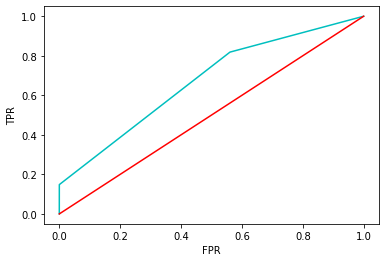

classification report - Train 
               precision    recall  f1-score   support

           0       0.71      0.44      0.54     60213
           1       0.60      0.82      0.69     60213

    accuracy                           0.63    120426
   macro avg       0.65      0.63      0.62    120426
weighted avg       0.65      0.63      0.62    120426

classification report - Test 
                precision    recall  f1-score   support

           0       0.42      0.44      0.43      7612
           1       0.83      0.82      0.82     25721

    accuracy                           0.73     33333
   macro avg       0.62      0.63      0.63     33333
weighted avg       0.74      0.73      0.73     33333



In [256]:
dt= DecisionTreeClassifier(criterion = 'entropy',max_depth =2,min_samples_leaf = 1,min_samples_split = 2)
model_eval(dt, X_train_sm, X_test, y_train_sm, y_test)

In [257]:
from sklearn import svm

In [ ]:
sv = svm.SVC(kernel='linear',probability=True)
model_eval(sv, X_train_sm, X_test, y_train_sm, y_test)

In [1]:
 4622-3376

1246

In [2]:
1246/4622

0.26958026828212894